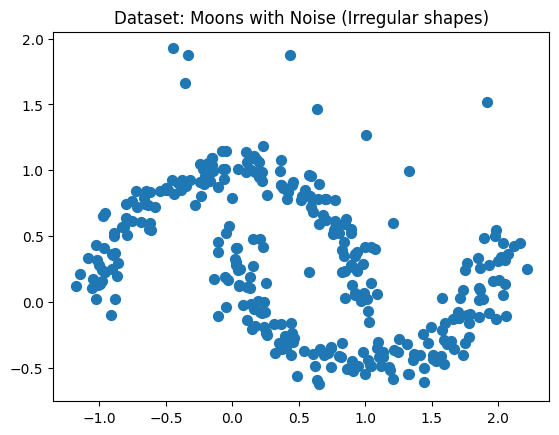

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

# 1️⃣ Create dataset with irregular shapes + noise
X, y_true = make_moons(n_samples=300, noise=0.08, random_state=42)

# Add some random noise points (outliers)
np.random.seed(42)
noise = np.random.uniform(low=-0.5, high=2.0, size=(20,2))
X = np.vstack([X, noise])

plt.scatter(X[:,0], X[:,1], s=50)
plt.title("Dataset: Moons with Noise (Irregular shapes)")
plt.show()

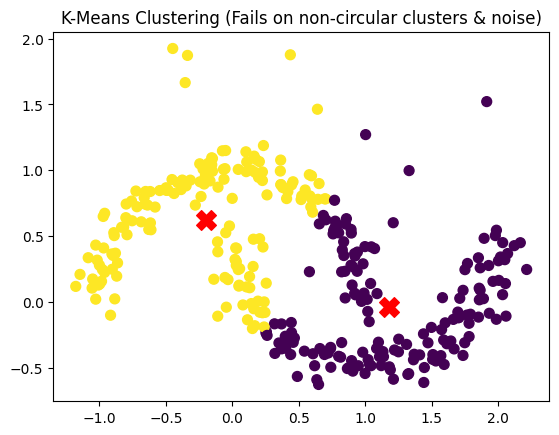

In [3]:
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker='X', s=200)
plt.title("K-Means Clustering (Fails on non-circular clusters & noise)")
plt.show()

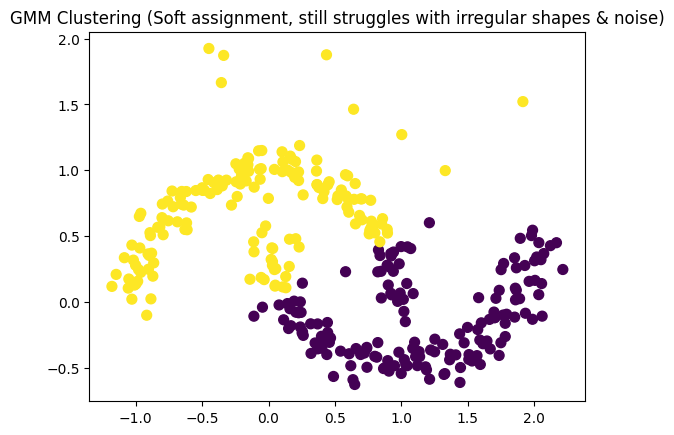

In [4]:
gmm = GaussianMixture(n_components=2, random_state=42)
y_gmm = gmm.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_gmm, cmap='viridis', s=50)
plt.title("GMM Clustering (Soft assignment, still struggles with irregular shapes & noise)")
plt.show()


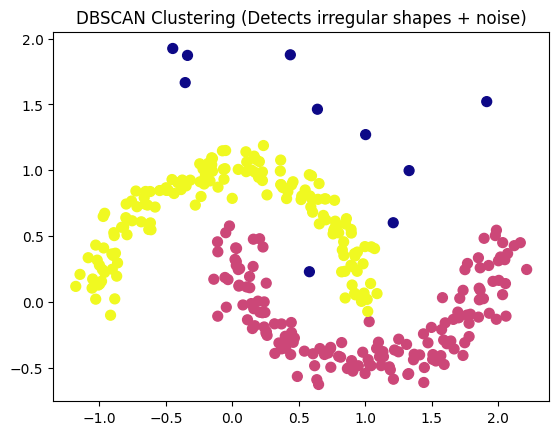

In [5]:
dbscan = DBSCAN(eps=0.2, min_samples=6)
y_dbscan = dbscan.fit_predict(X)

# -1 labels are noise
plt.scatter(X[:,0], X[:,1], c=y_dbscan, cmap='plasma', s=50)
plt.title("DBSCAN Clustering (Detects irregular shapes + noise)")
plt.show()